<a href="https://colab.research.google.com/github/kumarsarvesh0224/PP_Credit_card_fraud_detection/blob/main/PP_CreditCard_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import warnings
warnings.filterwarnings('ignore')



EDA

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Portfolio project/MachineLearning/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [ ]:
#checking the shape of data

df.shape

(284807, 31)

In [ ]:
#checking the summary i.e. datatypes, null and non null values distribution

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
#checking the statistical summary

df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
#checking the count of legit and fraud transactions in our data

df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [ ]:
#percentage of transactions

values= df['Class'].value_counts()
print('Percentage of legit transactions is',values[0]/df['Class'].count()*100,'%')
print('Percentage of fraud transactions is',values[1]/df['Class'].count()*100,'%')

Percentage of legit transactions is 99.82725143693798 %
Percentage of fraud transactions is 0.1727485630620034 %


<Axes: ylabel='Class'>

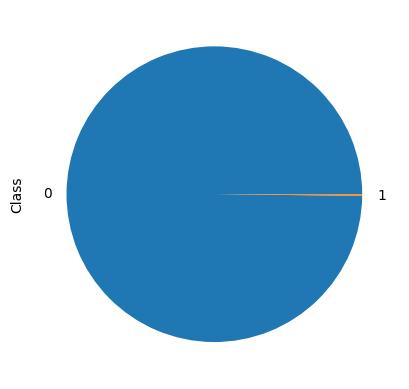

In [ ]:
#pie plot for better visualization

((df.groupby('Class')['Class'].count()/df['Class'].count())*100).plot.pie()

In [ ]:
#Legit and farud values seperation

t_legit= df[df.Class == 0]
t_fraud= df[df.Class == 1]

The number of fraud transactions wrt to the legit transactions are very less which is not good for our model. We need to randomly sample the equal number of legit transactions as there are in fraud.

In [ ]:
# Randomly sampling 492 rows

legit_sample = t_legit.sample(n=492)

In [ ]:
#Recreating the dataset

df = pd.concat([legit_sample, t_fraud], axis=0)

In [ ]:
df['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

In [ ]:
#checking the summary again

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 984 entries, 191566 to 281674
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    984 non-null    float64
 1   V1      984 non-null    float64
 2   V2      984 non-null    float64
 3   V3      984 non-null    float64
 4   V4      984 non-null    float64
 5   V5      984 non-null    float64
 6   V6      984 non-null    float64
 7   V7      984 non-null    float64
 8   V8      984 non-null    float64
 9   V9      984 non-null    float64
 10  V10     984 non-null    float64
 11  V11     984 non-null    float64
 12  V12     984 non-null    float64
 13  V13     984 non-null    float64
 14  V14     984 non-null    float64
 15  V15     984 non-null    float64
 16  V16     984 non-null    float64
 17  V17     984 non-null    float64
 18  V18     984 non-null    float64
 19  V19     984 non-null    float64
 20  V20     984 non-null    float64
 21  V21     984 non-null    float64

In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,...,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000
mean,87352.867886,-2.339223,1.789042,-3.461716,2.288478,-1.598918,-0.637536,-2.774565,0.299627,-1.324951,...,0.359167,0.003381,-0.001985,-0.056173,0.022234,0.026251,0.090522,0.041588,107.792195,0.500000
std,46846.863428,5.525049,3.720635,6.237565,3.203608,4.208471,1.788459,5.891061,4.848227,2.296173,...,2.787741,1.163578,1.182825,0.577444,0.668968,0.474814,1.007911,0.410596,279.164494,0.500254
min,406.000000,-30.552380,-21.255180,-31.103685,-4.207515,-22.105532,-6.406267,-43.557242,-41.044261,-13.434066,...,-22.797604,-8.887017,-19.254328,-2.028024,-4.781606,-1.420358,-7.263482,-1.869290,0.000000,0.000000
25%,49193.750000,-2.762972,-0.146216,-5.084967,-0.007268,-1.848448,-1.509099,-3.044451,-0.180974,-2.345581,...,-0.155590,-0.536049,-0.230365,-0.413837,-0.300566,-0.295029,-0.053365,-0.053281,1.790000,0.000000
50%,78644.000000,-0.784458,0.944667,-1.245839,1.293521,-0.467639,-0.592006,-0.684707,0.158239,-0.728721,...,0.158002,0.006589,-0.034226,0.012858,0.033557,-0.012025,0.058514,0.035380,19.720000,0.500000
75%,132214.750000,1.057870,2.791569,0.459243,4.305361,0.454483,0.147370,0.234036,0.877002,0.131574,...,0.652748,0.546625,0.190727,0.373636,0.387768,0.337514,0.429339,0.209506,99.990000,1.000000
max,172734.000000,2.366845,22.057729,3.547383,12.114672,11.095089,9.737874,21.915116,20.007208,4.265205,...,27.202839,8.361985,8.671115,3.177950,3.467907,2.745261,3.937467,1.779364,5303.690000,1.000000


In [ ]:
#checking the correlation between the attributes

corr = df.corr()
corr

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,0.252783,-0.219903,0.159717,-0.200580,0.290136,0.110932,0.221784,-0.150022,0.162337,...,-0.065802,0.120908,0.076071,-0.007380,-0.193139,-0.038554,-0.143342,0.002160,0.000670,-0.141086
V1,0.252783,1.000000,-0.788983,0.883143,-0.622083,0.867666,0.305917,0.865586,-0.078694,0.671052,...,0.015324,-0.041257,-0.066039,-0.066614,-0.092515,0.049763,0.180751,0.202056,-0.075641,-0.440532
V2,-0.219903,-0.788983,1.000000,-0.847237,0.666260,-0.766645,-0.326224,-0.857165,-0.016755,-0.692342,...,0.048388,-0.010987,0.092189,-0.008988,0.067412,0.000047,-0.183327,0.010878,-0.286130,0.493375
V3,0.159717,0.883143,-0.847237,1.000000,-0.774189,0.852171,0.459415,0.878680,-0.169164,0.764163,...,0.030094,-0.066251,-0.038986,0.006016,-0.091943,-0.006376,0.101271,0.144528,-0.022361,-0.572881
V4,-0.200580,-0.622083,0.666260,-0.774189,1.000000,-0.580334,-0.434631,-0.696056,0.100573,-0.783488,...,-0.022733,0.128204,0.032790,-0.068369,-0.018010,0.140423,-0.005822,-0.076608,0.030837,0.703799
V5,0.290136,0.867666,-0.766645,0.852171,-0.580334,1.000000,0.288946,0.819551,-0.200589,0.655047,...,0.048809,-0.109354,-0.107819,-0.122302,-0.108190,0.057837,0.175652,0.173516,-0.142413,-0.369041
V6,0.110932,0.305917,-0.326224,0.459415,-0.434631,0.288946,1.000000,0.310661,-0.557438,0.389785,...,0.013281,0.003708,0.367881,-0.013305,-0.084820,-0.049146,-0.143252,-0.020279,0.241676,-0.425275
V7,0.221784,0.865586,-0.857165,0.878680,-0.696056,0.819551,0.310661,1.000000,0.082495,0.755312,...,0.034805,-0.113390,-0.048776,-0.046235,0.072311,0.025823,0.248158,0.164008,0.179562,-0.474547
V8,-0.150022,-0.078694,-0.016755,-0.169164,0.100573,-0.200589,-0.557438,0.082495,1.000000,-0.075058,...,-0.116062,0.031427,-0.431085,0.081925,0.233336,0.047414,0.284110,-0.020968,0.003800,0.055927
V9,0.162337,0.671052,-0.692342,0.764163,-0.783488,0.655047,0.389785,0.755312,-0.075058,1.000000,...,0.166216,-0.245676,-0.045102,0.024536,-0.017417,-0.119829,0.133198,0.146577,0.022605,-0.547350


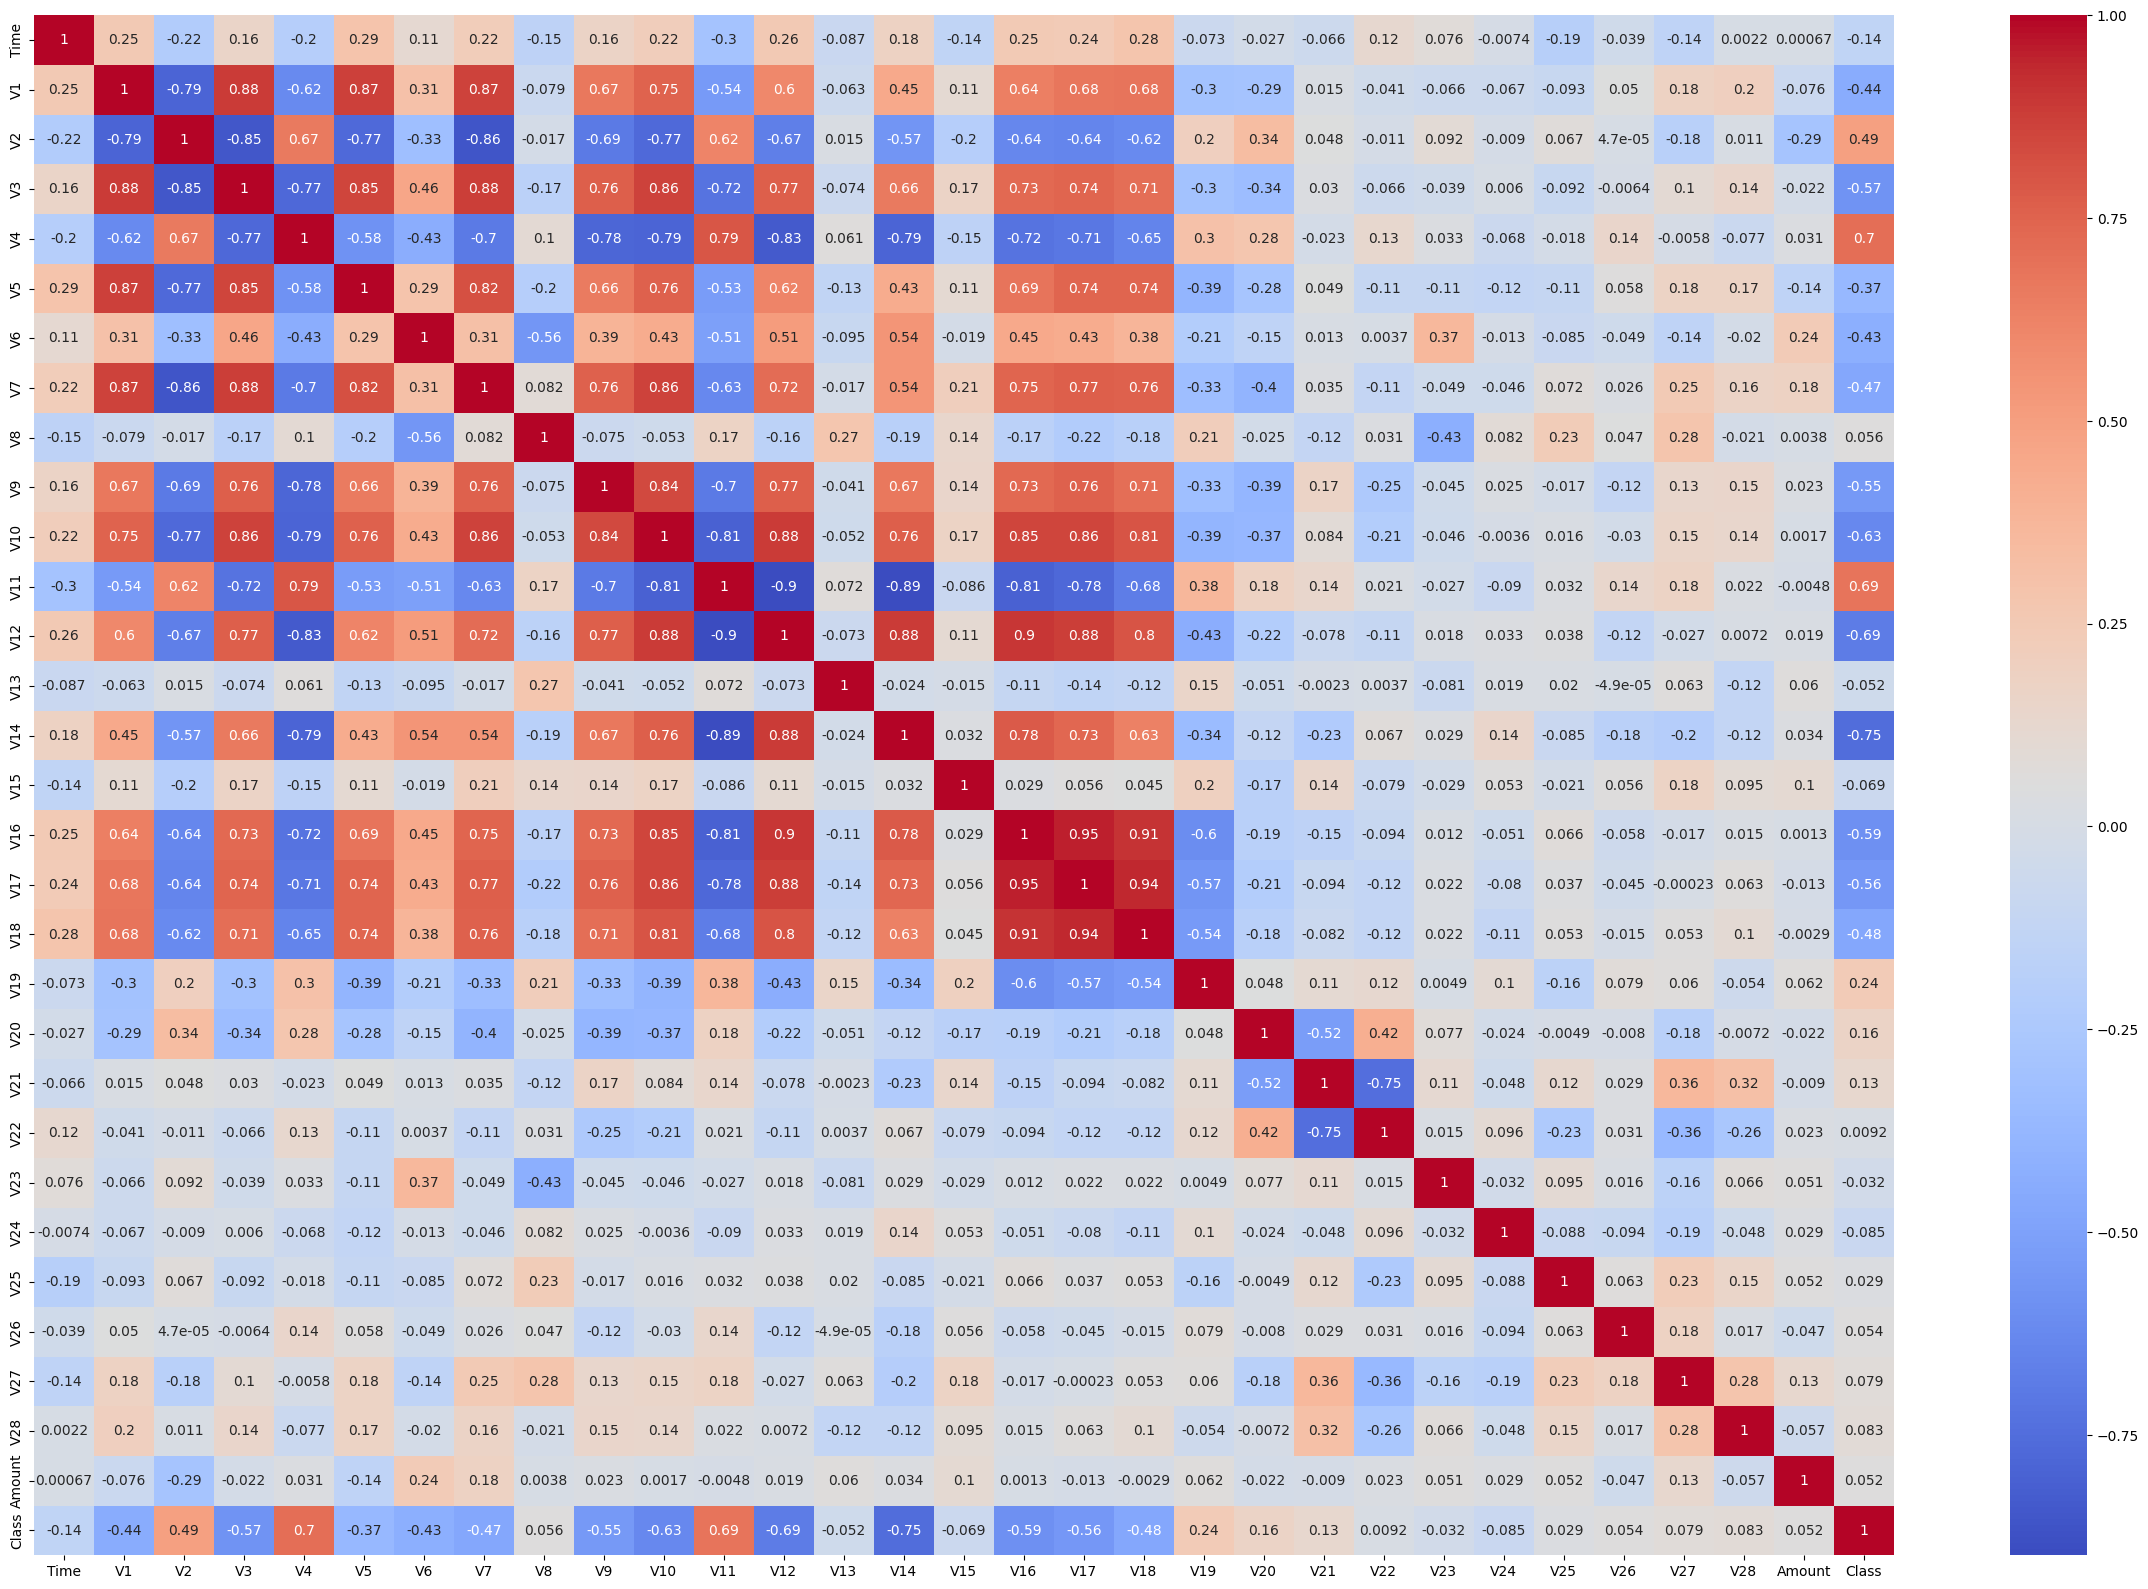

In [ ]:
#heatmap of correlation
plt.figure(figsize=(30,20))
sns.heatmap(corr, cmap = 'coolwarm', annot = True)
plt.show()

In [ ]:
#the time given is in relative fashion so we need to convert it to duration

Delta_Time = pd.to_timedelta(df['Time'],unit ='s')

#creating the columns with day,min and hour

df['Time_Day'] = (Delta_Time.dt.components.days).astype(int)
df['Time_Hour'] = (Delta_Time.dt.components.hours).astype(int)
df['Time_Min'] = (Delta_Time.dt.components.minutes).astype(int)


In [ ]:
#checking the newly appended data

df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V24,V25,V26,V27,V28,Amount,Class,Time_Day,Time_Hour,Time_Min
191566,129320.0,-0.674959,0.928199,-1.754147,4.821937,1.483197,-1.107294,0.922094,-0.030090,-2.081602,...,0.054372,-1.367034,0.467715,0.163329,0.558351,10.00,0,1,11,55
113115,72941.0,1.212923,0.369630,0.480308,1.112732,-0.304743,-0.866407,0.185920,-0.242469,-0.086819,...,0.405444,0.569619,-0.443276,0.026444,0.029555,14.95,0,0,20,15
271809,164759.0,-0.767926,1.214127,-0.398956,-0.820216,1.082212,-0.514625,1.033233,-0.355941,0.341713,...,0.577635,-1.299338,-0.113729,-0.568584,0.133191,2.58,0,1,21,45
131664,79688.0,-8.705618,-10.288075,1.082057,4.573700,7.071217,-6.314873,-5.282582,0.990072,-0.531208,...,0.796674,-0.067929,-0.481331,0.193125,-1.705867,1.00,0,0,22,8
277092,167456.0,1.860449,-0.128954,-0.212408,1.177121,-0.457401,-0.343800,-0.382338,0.052460,0.400033,...,-0.061810,-0.478321,-0.988854,0.044932,-0.029193,30.00,0,1,22,30


In [ ]:
#dropping the unnecessary columns of time, day and minutes

df.drop(['Time','Time_Day','Time_Min'], axis = 1, inplace = True)

In [ ]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Time_Hour
191566,-0.674959,0.928199,-1.754147,4.821937,1.483197,-1.107294,0.922094,-0.030090,-2.081602,2.244122,...,1.719280,0.853344,0.054372,-1.367034,0.467715,0.163329,0.558351,10.00,0,11
113115,1.212923,0.369630,0.480308,1.112732,-0.304743,-0.866407,0.185920,-0.242469,-0.086819,-0.035396,...,-0.057834,-0.039832,0.405444,0.569619,-0.443276,0.026444,0.029555,14.95,0,20
271809,-0.767926,1.214127,-0.398956,-0.820216,1.082212,-0.514625,1.033233,-0.355941,0.341713,0.229650,...,-0.454814,0.174941,0.577635,-1.299338,-0.113729,-0.568584,0.133191,2.58,0,21
131664,-8.705618,-10.288075,1.082057,4.573700,7.071217,-6.314873,-5.282582,0.990072,-0.531208,0.050983,...,-1.423494,-0.174206,0.796674,-0.067929,-0.481331,0.193125,-1.705867,1.00,0,22
277092,1.860449,-0.128954,-0.212408,1.177121,-0.457401,-0.343800,-0.382338,0.052460,0.400033,0.379416,...,-0.205150,0.367916,-0.061810,-0.478321,-0.988854,0.044932,-0.029193,30.00,0,22


In [ ]:
#splitting the data

y = df['Class']
x = df.drop(['Class'], axis = 1)

In [ ]:
x.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Time_Hour
191566,-0.674959,0.928199,-1.754147,4.821937,1.483197,-1.107294,0.922094,-0.030090,-2.081602,2.244122,...,0.497511,1.719280,0.853344,0.054372,-1.367034,0.467715,0.163329,0.558351,10.00,11
113115,1.212923,0.369630,0.480308,1.112732,-0.304743,-0.866407,0.185920,-0.242469,-0.086819,-0.035396,...,-0.036819,-0.057834,-0.039832,0.405444,0.569619,-0.443276,0.026444,0.029555,14.95,20
271809,-0.767926,1.214127,-0.398956,-0.820216,1.082212,-0.514625,1.033233,-0.355941,0.341713,0.229650,...,-0.154831,-0.454814,0.174941,0.577635,-1.299338,-0.113729,-0.568584,0.133191,2.58,21
131664,-8.705618,-10.288075,1.082057,4.573700,7.071217,-6.314873,-5.282582,0.990072,-0.531208,0.050983,...,0.903774,-1.423494,-0.174206,0.796674,-0.067929,-0.481331,0.193125,-1.705867,1.00,22
277092,1.860449,-0.128954,-0.212408,1.177121,-0.457401,-0.343800,-0.382338,0.052460,0.400033,0.379416,...,-0.058789,-0.205150,0.367916,-0.061810,-0.478321,-0.988854,0.044932,-0.029193,30.00,22


In [ ]:
y.head()

191566    0
113115    0
271809    0
131664    0
277092    0
Name: Class, dtype: int64

In [ ]:
#plotting the distribution

col = list(x.columns.values)

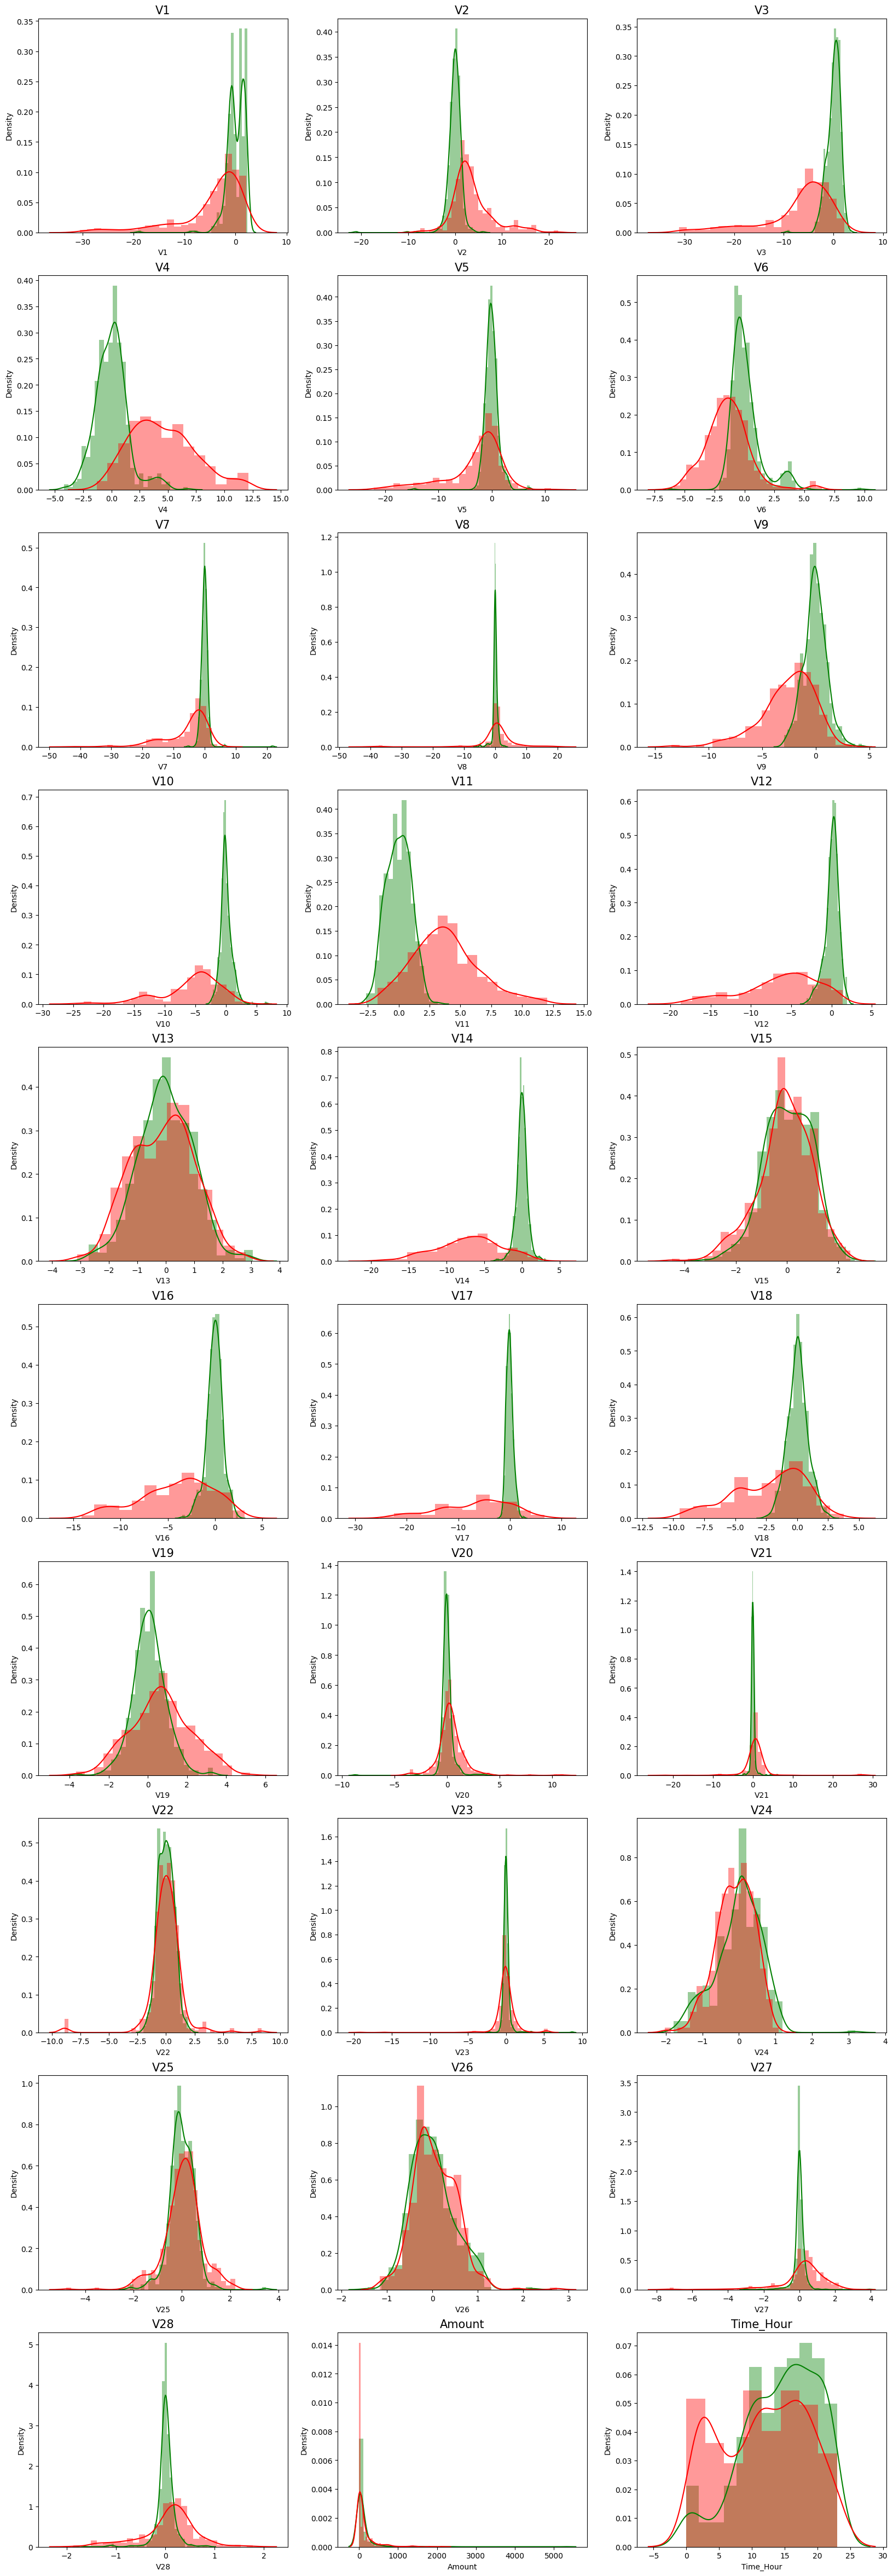

In [ ]:
#plotting the histogram to check the skewness

legit_records = df.Class ==0
fraud_records = df.Class ==1
plt.figure(figsize = (20,60))
for n,column in enumerate(col):
  plt.subplot(10,3,n+1)
  sns.distplot(x[column][legit_records], color = 'green')
  sns.distplot(x[column][fraud_records], color = 'red')
  plt.title(column, fontsize = 15)
plt.show()


Model Building

In [ ]:
#creating a dataframe that will store results from all the models

df_results = pd.DataFrame({'Model': [], 'Accuracy': []})


In [ ]:
#train test splitting

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 100)

In [ ]:
#Models

model = {'Logistic Regression':LogisticRegression(),'KNN':KNeighborsClassifier(n_neighbors = 5), 'Decision Tree':DecisionTreeClassifier(random_state = 43), 'Random Forest':RandomForestClassifier(n_estimators=100, random_state=43), 'Extreme Gradient Boosting':XGBClassifier()}

#Model prediction and storing the accuracy into the df_results

for name, type in model.items() :
  type.fit(x_train, y_train)
  y_pred = type.predict(x_test)
  accuracy = accuracy_score(y_test,y_pred)
  df_results = df_results.append(pd.DataFrame({'Model':[name], 'Accuracy':accuracy}),ignore_index = True)

In [ ]:
df_results

,Model,Accuracy
0,Logistic Regression,0.928934
1,KNN,0.883249
2,Decision Tree,0.928934
3,Random Forest,0.944162
4,Extreme Gradient Boosting,0.923858


In [ ]:
df_results.sort_values(by = 'Accuracy', ascending = False)

,Model,Accuracy
3,Random Forest,0.944162
0,Logistic Regression,0.928934
2,Decision Tree,0.928934
4,Extreme Gradient Boosting,0.923858
1,KNN,0.883249


The maximum accuracy has been provided by th Random forest model i.e. 94.4%